<a href="https://colab.research.google.com/github/servetoksuz/ADA_animation/blob/main/EoN_Servet_17Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import numpy library
import numpy as np

# create the class Institution
class Institution():
  def __init__(self, name, nVis, distExp, xyLoc, pVis, nInf, idAg, pAg, pInf, infList):
    self.name = name
    self.nVis = nVis
    self.distExp = distExp
    self.xyLoc = xyLoc
    self.pVis = pVis
    self.nInf = nInf
    self.idAg = idAg
    self.pAg = pAg
    self.pInf = pInf
    self.infList = infList


In [ ]:
# Create elemSch as an instance of Institution
# Change the lists to numpy arrays
elemSch = Institution("elemSch", {'adult':[1],'teen':[1], 'pri':[0,1]}, -10, np.array([[3,7,5,2,8],[2,8,4,9,1]]),
                      {'adult':[[]],'teen':[[]], 'pri':[[],[0.95]]}, 0.5, [ np.array([]).astype(int) for _ in range(5)],
                      [np.array([]).astype(int) for _ in range(5)], 0.05, [])

# Create HS as an instance of Institution
HS = Institution( "HS",{'adult':[1],'teen':[0,1], 'pri':[1]},-10,np.array([[4,8],[3,7]])
                 ,{'adult':[[]],'teen':[[],[0.95]], 'pri':[[]]} ,0.5, [ np.array([]).astype(int) for _ in range(2)],
                 [ np.array([]).astype(int) for _ in range(2)], 0.05,[])
# Create supermarket as an instance of Institution
supermarket = Institution("supermarket" ,{'adult':[0.2,0.4,0.3,0.1],'teen':[0.8,0.2], 'pri':[1]} ,-1
                          , np.array([[1,1,9,9,5],[1,9,1,9,5]]),{'adult':[[],[0.25],[0.15,0.1],[0.1,0.1,0.05]],'teen':[[],[0.75]], 'pri':[[]]}
                          , 0.3, [ np.array([]).astype(int) for _ in range(5)], [ np.array([]).astype(int) for _ in range(5)], 0.03,[])
# Create workplace as an instance of Institution
workplace = Institution("workplace",{'adult':[0.25,0.75],'teen':[0.8,0.2], 'pri':[1]},-0.25
                        , np.array([[1.7,5,8,1.7,5,8,1.7,5,8],[1.7,1.7,1.7,5,5,5,8,8,8]])
                        , {'adult':[[],[0.95]],'teen':[[],[0.75]], 'pri':0}, 0.6,
                        [ np.array([]).astype(int) for _ in range(9)], [ np.array([]).astype(int) for _ in range(9)], 0.05,[])

In [ ]:
instList = [elemSch, HS, supermarket, workplace]

In [ ]:
# Create Homes class
class Homes():
  def __init__ (self, pRes, pInf, xyLoc, idAg, infList):
    self.pRes = pRes
    self.pInf = pInf
    self.xyLoc = xyLoc
    self.idAg = idAg
    self.infList = infList

In [ ]:
#parameters
xLim = np.array([0,10])
yLim = np.array([0,10])
nHome=50
nAgMax = 300

In [ ]:
# create homes Instance

homes = Homes({'adult':[0,0.3,0.6,0.1], 'teen':[0.3,0.3,0.3,0.1], 'pri':[0.3,0.3,0.3,0.1]},
              0.3, np.zeros((2,nHome)), [], [])

#Define x,y locations of Home class
homes.xyLoc[0,:] = np.random.uniform(xLim[0], xLim[1],nHome)
homes.xyLoc[1,:] = np.random.uniform(yLim[0], yLim[1],nHome)

In [ ]:
# Create Agents class
class Agents:
  def __init__ (self, typ, status, home):
    self.typ = typ
    self.status = status
    self.home = home

agents = Agents(typ = list(range(nAgMax)),status = np.zeros(nAgMax), home = list(range(nAgMax)))



In [ ]:
import pdb

In [ ]:
 agTyp=["pri","teen","adult"]
 ja = 0    #Initialize index
 for jh in range(nHome):   #Loop for jh in range(nHome):
   newHome = np.array([]).astype(int) # Create an empty list
   # pdb.set_trace()
   for thisAg in agTyp:
     plist = homes.pRes[thisAg]
     nAgHome = np.random.choice(np.arange(len(plist)), size=1, p=plist)[0]
     for jj in np.arange(nAgHome):
       agents.typ[ja] = thisAg #add agTyp tp agents.typ
       agents.home[ja] = jh
       newHome = np.append(newHome, ja)

       for thisInst in instList:  #loop through institution types
         nInstVisDist = thisInst.nVis[thisAg] #distribution of number of visits for this ag.type
         nInstVis = np.random.choice(np.arange(len(nInstVisDist)), size = 1, p = nInstVisDist)[0]
         distList = np.sqrt((thisInst.xyLoc[0,:]-homes.xyLoc[0,jh])**2+(thisInst.xyLoc[0,:]-homes.xyLoc[0,jh])**2) #create list of distances between this home and institutions
         probList = distList**thisInst.distExp
         probList = probList = probList/sum(probList)
         theseInsts = np.random.choice(np.arange(len(probList)),size = nInstVis, replace = False, p=probList)

         for ji, jInst in enumerate(theseInsts):
           thisInst.idAg[jInst] = np.append(thisInst.idAg[jInst], ja)
           thisInst.pAg[jInst] = np.append(thisInst.pAg[jInst] , thisInst.pVis[thisAg][nInstVis][ji])
       ja = ja+1
   homes.idAg = homes.idAg + [newHome]
agents.home  = agents.home[0:ja]
agents.status = agents.status[0:ja]
agents.typ = agents.typ[0:ja]
nAgMax = len(agents.home)
agents.status[0] = 1






In [ ]:
elemSch.idAg

[array([  0,   1,  15,  96, 114, 115, 118]),
 array([ 50,  51, 105, 135]),
 array([ 19,  26,  31,  93, 128, 129, 139, 140, 141, 152, 155, 156, 157,
        180, 181, 182, 188, 189]),
 array([ 63,  64, 100, 160, 161, 176, 177, 184]),
 array([ 10,  11,  37,  41,  44,  45,  83,  84, 111])]

In [ ]:
# Simulation Loop
i = 1  #initiate
Tsim = 10
infDur = 7
recDur = 21
for jt in np.arange(Tsim):
  #pdb.set_trace()
  infContact = 0*agents.status  #infectious contacts
  #Process infections in an institution
  for thisInst in instList:
    for ji,thisList in enumerate(thisInst.idAg):
      theseInfP = thisInst.pAg[ji][agents.status[thisList]>0]
      pNotInf = np.prod(1-theseInfP*thisInst.pInf)
      pthisInf = thisInst.pAg[ji]*(1-pNotInf)
      infectVec = np.random.binomial(1, pthisInf, size = len(thisList)) # generate a binomial distribution for infection
      infectVec = infectVec*(agents.status[thisList]==0)
      infContact[thisList] = infContact[thisList] + infectVec  # these susceptibles who visit the same institution
  for jh,thisList in enumerate(homes.idAg):
    jhInf = np.sum(agents.status[homes.idAg[jh]]>0) #count the infected in the home
    pNotInf = np.prod(1-homes.pInf) # Probability that any susceptible is infected
    pthisInf = 1 - pNotInf
    infectVec = np.random.binomial(1, pthisInf, size=len(thisList)) #compute the probability of infected in home
    infectVec = infectVec*(agents.status[thisList]--0)
    infContact[thisList]= infContact[thisList]+infectVec # These infects visit the same house

  agents.status[np.where((agents.status > 0) | (agents.status <0))] +=1
  agents.status[np.where(agents.status == infDur)] = -1*recDur
  agents.status = agents.status + (infContact >0)*(agents.status==0)
  agents.status = agents.status.astype(int)
  print(agents.status[:10])

[2 0 0 0 0 0 0 0 0 0]
[3 0 0 0 0 0 0 0 0 0]
[4 0 0 0 0 0 0 0 0 0]
[5 1 0 0 0 0 0 0 0 0]
[6 2 0 0 0 0 0 0 0 0]
[-21   3   0   0   0   0   0   0   0   0]
[-20   4   0   0   0   0   0   0   0   0]
[-19   5   0   0   0   0   0   0   0   0]
[-18   6   0   0   0   0   0   0   0   0]
[-17 -21   0   0   0   0   0   0   0   0]


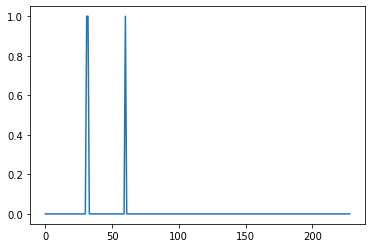

In [ ]:
# Graphs
import matplotlib.pyplot as plt #import necessary library
plt.plot(newInf)

In [ ]:
newInf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])